In [25]:
import numpy as np
import statsmodels.api as sm

# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
#print X
X = sm.add_constant(X)
beta = [3, 1, 10]
#beta = [3, 1]
e = np.random.random(nobs)
y = np.dot(X, beta) + e
#print y
# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print results.summary()
print results.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5290.
Date:                Sat, 14 Jan 2017   Prob (F-statistic):          9.49e-100
Time:                        16:17:18   Log-Likelihood:                -17.326
No. Observations:                 100   AIC:                             40.65
Df Residuals:                      97   BIC:                             48.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.5001      0.074     47.324      0.0

In [31]:
yPredicted = np.dot(X,results.params)
residuals = y - yPredicted
stdDevResiduals = np.std(residuals, ddof=1) #ddof=1 for SAMPLE std. dev.
standardizedResiduals = [x / stdDevResiduals for x in residuals]
print stdDevResiduals

0.289194838798


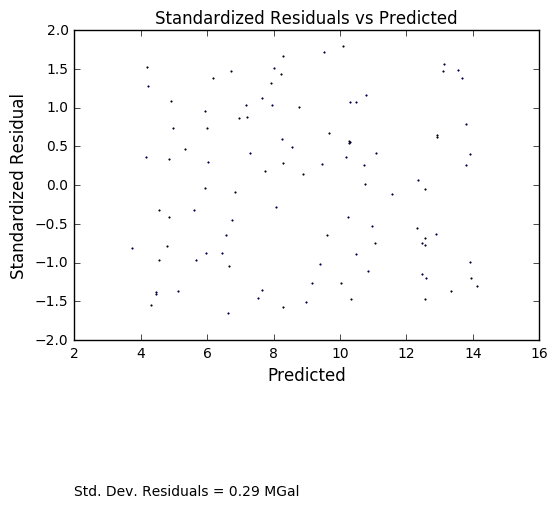

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
(fig, ax1) = plt.subplots()
plt.title("Standardized Residuals vs Predicted")
ax1.plot(yPredicted,standardizedResiduals,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("Predicted",fontsize=12)
ax1.set_ylabel("Standardized Residual",fontsize=12)
stdDevText = "Std. Dev. Residuals = %0.2f MGal" % stdDevResiduals
ax1.text(2,-4,stdDevText)